<h2>Imports<h2>

In [27]:
from common_language import _LANGUAGES
import processing as prlib
import matplotlib.pyplot as plt
import pandas as pd
import librosa

<h2>Features Processing<h2>

Get data frames

In [17]:
_, train_df, test_df, validation_df = prlib.get_dataframes()

Features matrix

In [ ]:
attributes_df = pd.DataFrame()
training_audios = train_df['paths'].tolist()
test_audios = test_df['paths'].tolist()
validation_audios = validation_df['paths'].tolist()

for i, audio in zip(range(len(validation_audios)), validation_audios):
    path = prlib.get_path("validation", audio)
    print(i, "/", len(validation_audios), path)
    row = prlib.get_data_vector("validation", audio)
    attributes_df = pd.concat([attributes_df, row], ignore_index=True)

matrix = attributes_df.values

<h2>Features visualisation<h2>

Initialisation

In [19]:
data_path = prlib.get_path('validation', validation_df['paths'][3929])
data1 = prlib.get_data(data_path)
#data = get_data(get_path('train', 'common_voice_en_19688238.wav'))
prlib.sample_rate,data_path

(16000, './data/wav_files/validation/common_voice_fa_19898708.wav')

Text(0.5, 0, 'Time')

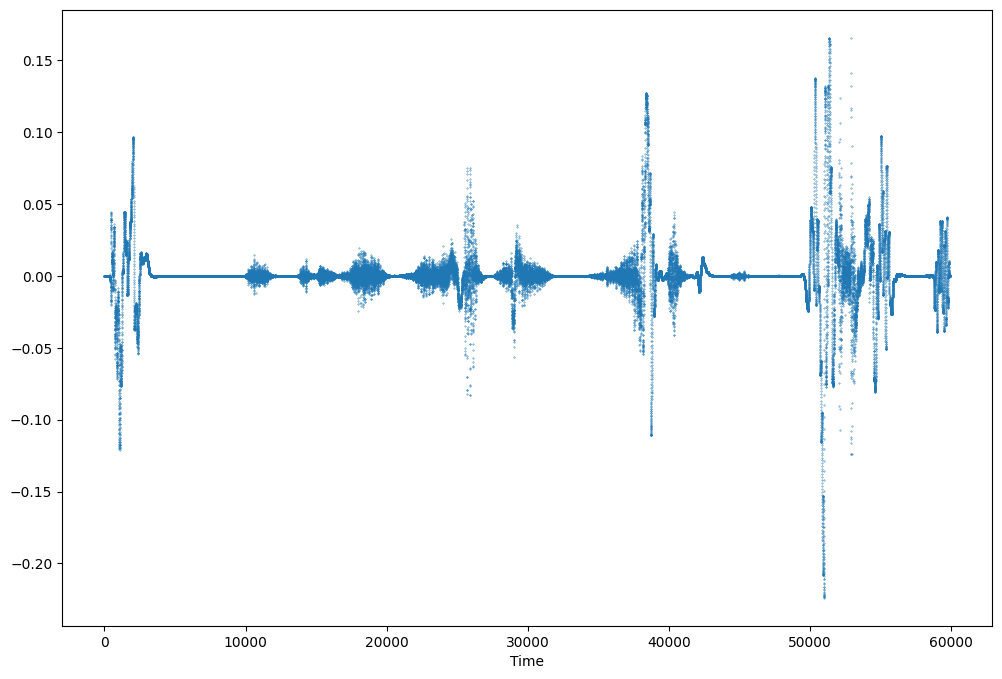

In [20]:
plt.figure(figsize=(12, 8))
plt.scatter(range(len(data)), data, s=0.1)
plt.xlabel('Time')

C:\Users\Samir\AppData\Local\Temp\ipykernel_26020\2199114491.py:5: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(data, n_fft=512)), y_axis='log', x_axis='time')


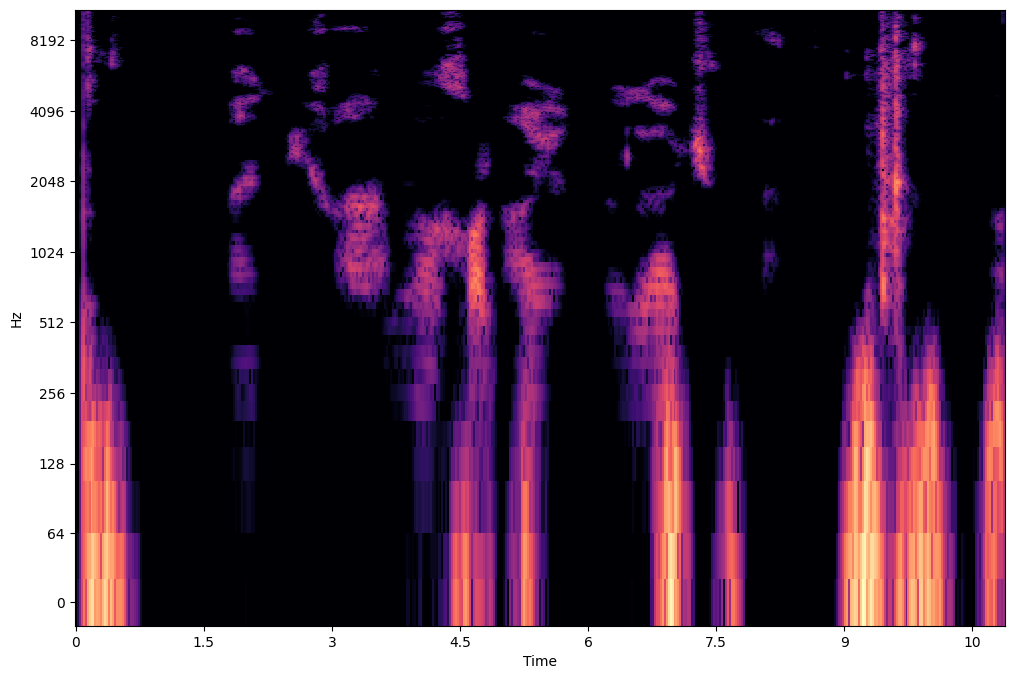

In [21]:
# https://librosa.org/doc/main/generated/librosa.stft.html

plt.figure(figsize=(12, 8))
#librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max), y_axis='log', x_axis='time')
librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(data, n_fft=512)), y_axis='log', x_axis='time')
#librosa.display.specshow(librosa.stft(data, n_fft=512), y_axis='log', x_axis='time')
plt.show()

Text(0.5, 0, 'Time')

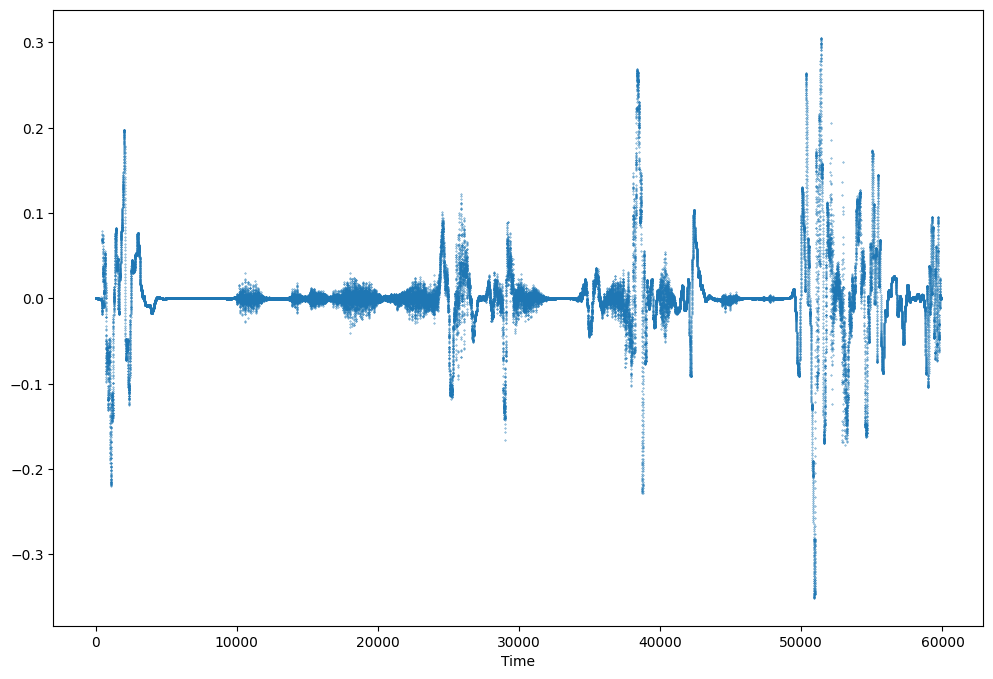

In [22]:
# scatter plot of data
plt.figure(figsize=(12, 8))
plt.scatter(range(len(data)), data1, s=0.1)
plt.xlabel('Time')

MFCCs visualisation

(25, 118)


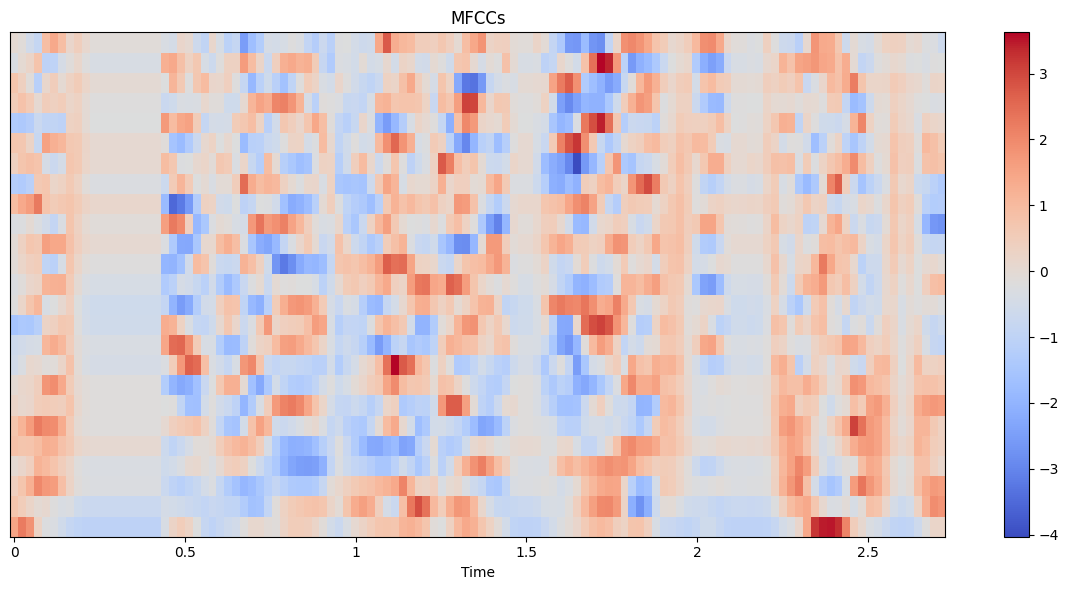

In [23]:
normalized_mfccs = prlib.get_Normalized_Mfccs(data)
print(normalized_mfccs.shape)
plt.figure(figsize=(12,6))
librosa.display.specshow(normalized_mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.tight_layout()
plt.show()

Spectral measurements visualisation

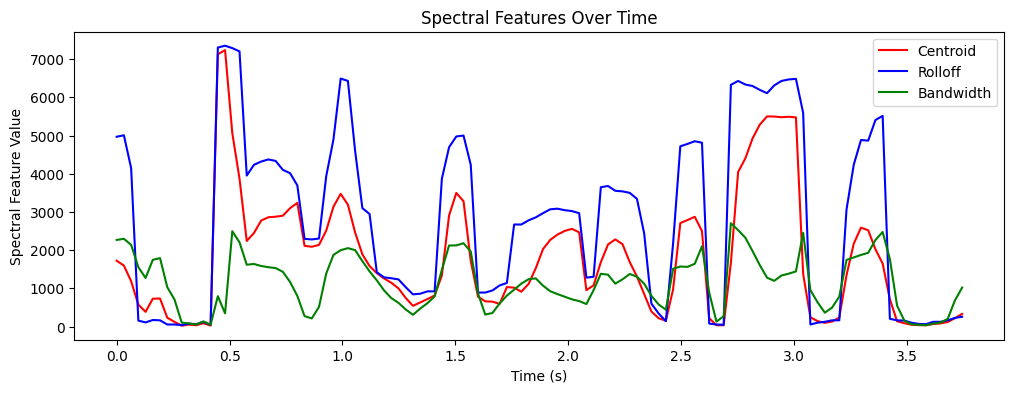

In [24]:
specs = prlib.get_spectral_measurements(data)
t = librosa.frames_to_time(range(len(specs[0])), sr=prlib.sample_rate)

# Plotting the Spectral Features
plt.figure(figsize=(12, 4))
plt.plot(t, specs[0], color='red', label='Centroid')
plt.plot(t, specs[1], color='blue', label='Rolloff')
plt.plot(t, specs[2], color='green', label='Bandwidth')

plt.xlabel("Time (s)")
plt.ylabel("Spectral Feature Value")
plt.title("Spectral Features Over Time")
plt.legend(loc='best')
plt.show()

Pitches visualisation

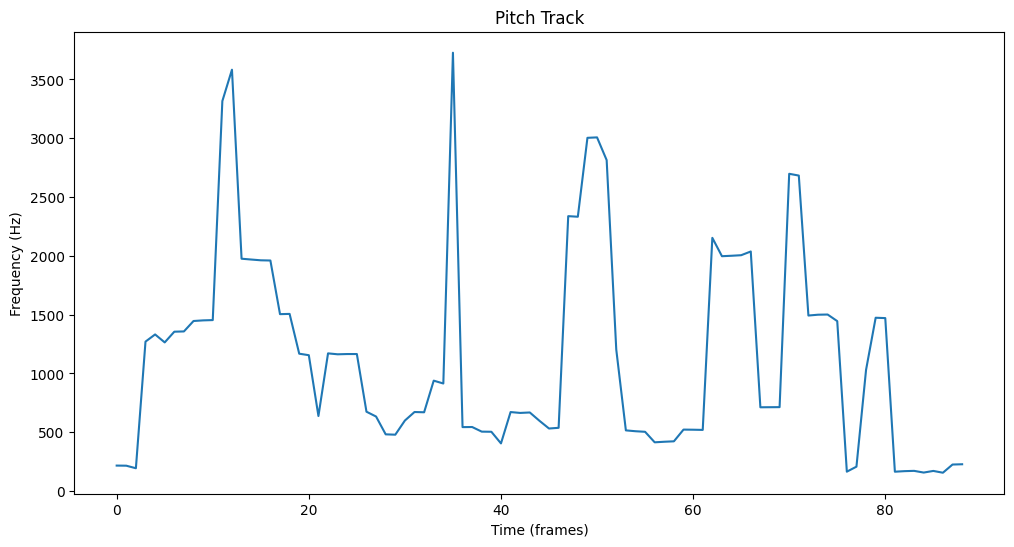

In [25]:
pitch_track = prlib.get_pitch_sequences(data)
plt.figure(figsize=(12, 6))
plt.plot(pitch_track)
plt.xlabel('Time (frames)')
plt.ylabel('Frequency (Hz)')
plt.title('Pitch Track')
plt.show()

RMS Visualisation

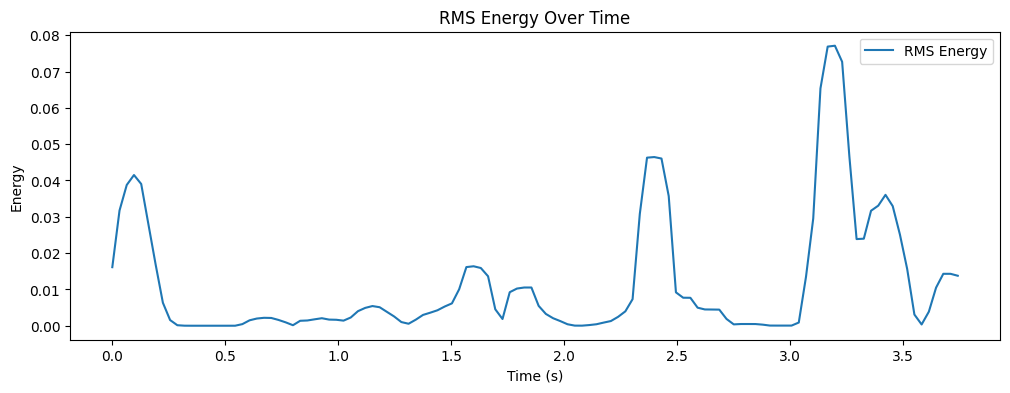

In [26]:
rms_energy = prlib.get_rms_energy(data)
frames = range(len(rms_energy[0]))
t = librosa.frames_to_time(frames, sr=prlib.sample_rate)

plt.figure(figsize=(12, 4))
plt.plot(t, rms_energy[0], label='RMS Energy')
plt.xlabel("Time (s)")
plt.ylabel("Energy")
plt.title("RMS Energy Over Time")
plt.legend()
plt.show()